(-1.0, 2.0)

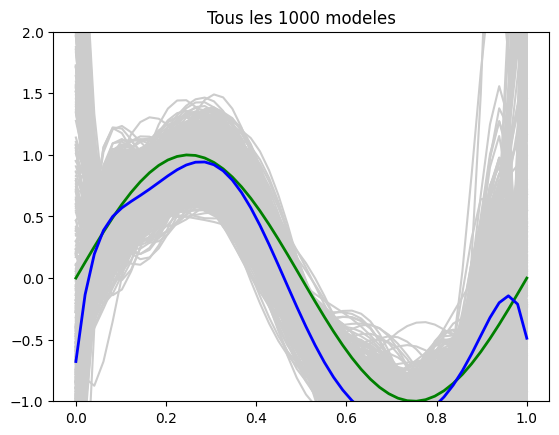

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge


# Génération des N exemples
N = 100
X = np.random.rand(N,1)
variance_bruit = 0.5
t = np.sin(X*2*np.pi)+np.sqrt(variance_bruit)*np.random.randn(N,1)
        
# Fonction qui génère un ensemble bootstrap
def bootstrap(X,t):
    N = X.shape[0]    
    # Tire un entier entre 1 et N, N fois, avec remplacement
    ii = np.random.randint(N,size=(N,))
    return X[ii-1,:],t[ii-1]

# Fonctions de base polynomiales
def fonctions_de_base(input):
    return input**np.arange(10)

# Bagging
M = 1000
modeles = []
for m in range(M):
    # Génère bootstrap
    Xb, tb = bootstrap(X,t)
    
    # Entraîne modèle de régression sur bootstrap
    m = Ridge(alpha=1e-10)
    m.fit(fonctions_de_base(Xb),tb)
    modeles.append(m)

# Illustration de tous les modèles entraînés et du modèle moyen

# Valeurs de x auxquelles on va évaluer les régresseurs
input_space = np.linspace(0.0, 1.0).reshape((-1,1))

plt.title('Tous les '+str(M)+' modeles')
avg = np.zeros((len(input_space),1))
for s in range(M):
    pred_s = modeles[s].predict(fonctions_de_base(input_space))
    plt.plot(input_space, pred_s,color='0.8')
    plt.ylim([-1,2])
    avg[:,0] += pred_s
avg /= M

# Fonction E[t|x] que l'on cherche (la meilleure solution possible)
plt.plot(input_space, np.sin(input_space*2*np.pi),'g',linewidth=2)
# Moyenne du modèle entraîné
plt.plot(input_space, avg.flatten(),'b',linewidth=2)
plt.ylim([-1,2])